# The Sparks Foundation

### created by: Nikhil S

### task 3 - EDA Exploratory data analysis - Retail 

## Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore'


# Importing Necessary Library 

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

## Importing datasets

In [3]:

url= 'https://bit.ly/3i4rbWl'
df= pd.read_csv(r"C:\Users\91779\Downloads\SampleSuperstore.csv")
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


## Understanding the Data

In [4]:
df.shape

(9994, 13)

### droping Unsecessary colunms

In [5]:


df.drop(["Country", "Postal Code"], axis = 1, inplace = True)
df.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


In [8]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [9]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### correlation Matrix 

In [10]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [11]:
print(df['Sub-Category'].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [12]:

print(df['Category'].unique())
print(df['Segment'].unique())
print(df['Region'].unique())

['Furniture' 'Office Supplies' 'Technology']
['Consumer' 'Corporate' 'Home Office']
['South' 'West' 'Central' 'East']


### Converting Categorical values for HeatMap analysis

In [13]:
cleanup_nums = {"Category": {'Furniture':1.01, 'Office Supplies':1.02, 'Technology':1.03},
                "Sub-Category" : {'Bookcases': 1.01, 'Chairs':1.02, 'Labels':1.03, 'Tables':1.04, 'Storage':1.05,
       'Furnishings':1.06, 'Art':1.07, 'Phones':1.071, 'Binders':1.08, 'Appliances':1.09, 'Paper':1.011,
       'Accessories':1.0111, 'Envelopes':1.012, 'Fasteners':1.013, 'Supplies':1.014, 'Machines':1.015,
       'Copiers':1.016} ,
               "Segment": {'Consumer':1, 'Corporate':1.01, 'Home Office':1.03},
                              "Region": {'South':1.01, 'West':1.02,'Central':1.03, 'East':1.04}}


cleanup_nums

{'Category': {'Furniture': 1.01, 'Office Supplies': 1.02, 'Technology': 1.03},
 'Sub-Category': {'Bookcases': 1.01,
  'Chairs': 1.02,
  'Labels': 1.03,
  'Tables': 1.04,
  'Storage': 1.05,
  'Furnishings': 1.06,
  'Art': 1.07,
  'Phones': 1.071,
  'Binders': 1.08,
  'Appliances': 1.09,
  'Paper': 1.011,
  'Accessories': 1.0111,
  'Envelopes': 1.012,
  'Fasteners': 1.013,
  'Supplies': 1.014,
  'Machines': 1.015,
  'Copiers': 1.016},
 'Segment': {'Consumer': 1, 'Corporate': 1.01, 'Home Office': 1.03},
 'Region': {'South': 1.01, 'West': 1.02, 'Central': 1.03, 'East': 1.04}}

In [14]:
dcf = df.replace(cleanup_nums)

Text(0.5, 1, 'Multi-Collinearity of Attributes')

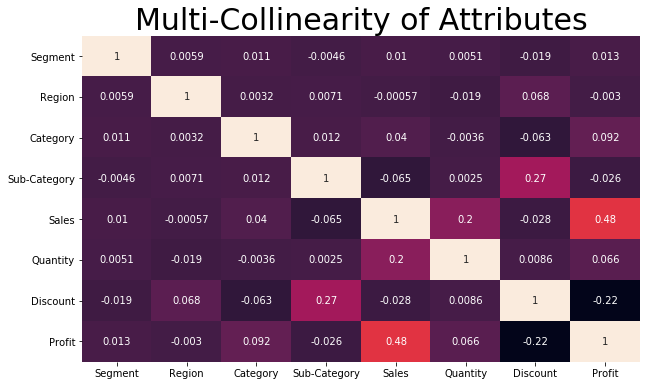

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(dcf.corr(),annot=True, cbar=False ,ax=ax)
ax.set_title('Multi-Collinearity of Attributes', fontsize=30)

#### From the heat map we can analysis the relation between few columns
<ol>
<li>sales vs Profit</li>
<li>Discount vs Profit</li>
<li>Sub-Categoriy Vs Discount</li>
</ol>

  <ul><li>lets further analyse these</li></ul>

###  Categories sold in the store 

Text(0.5, 1.0, 'Superstore Categories')

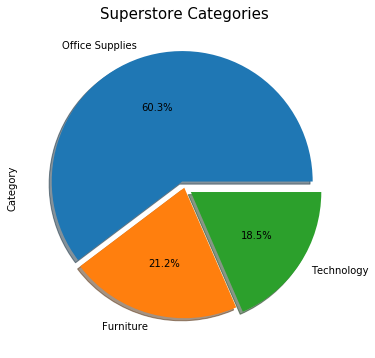

In [16]:
plt.figure(figsize=(15,6))
pieC = df['Category'].value_counts()

cmap = plt.get_cmap('Spectral')
pieC.plot.pie(autopct="%1.1f%%", shadow=True, explode = (0.05, 0, 0.06))
plt.title("Superstore Categories",fontsize=15)

### Sub-Categories sold in the store

Text(0.5, 1.0, 'Superstore sub category products')

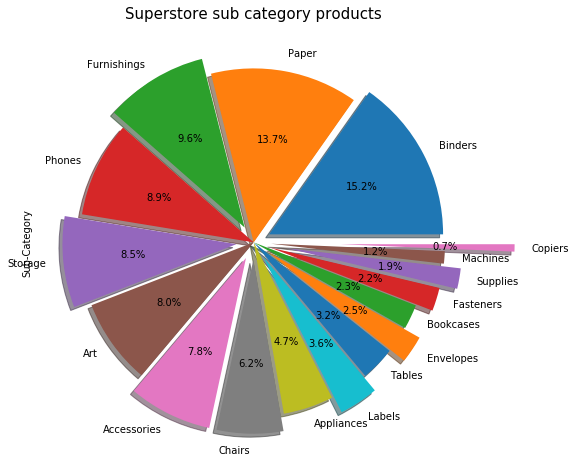

In [37]:
plt.figure(figsize=(16,8))
subCP = df['Sub-Category'].value_counts()
theme = plt.get_cmap('hsv')
subCP.plot.pie(autopct="%1.1f%%", shadow=True, explode=(0.1,0,0.1,0,0.1,0,0.1,0.1,0,0.1,0,0.1,0,0.1,0.2,0.1,0.5))
plt.title('Superstore sub category products', fontsize=15)

### Shipment Modes preferred by customes

C:\Users\91779\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


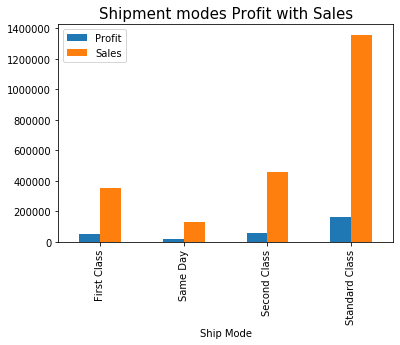

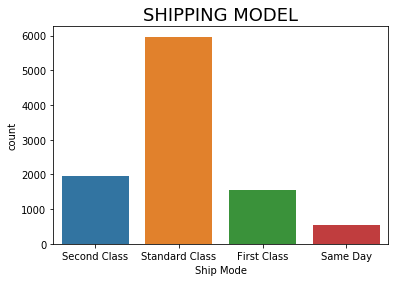

<Figure size 1152x288 with 0 Axes>

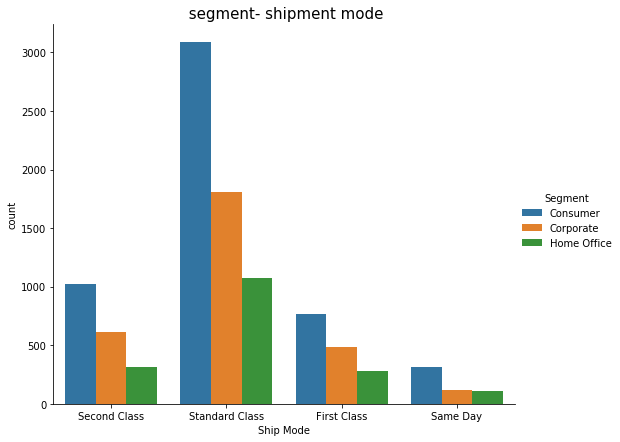

In [40]:

df.groupby("Ship Mode")["Profit","Sales"].agg('sum').plot.bar()
plt.title("Shipment modes Profit with Sales",fontsize=15)
plt.show()

sns.countplot(df['Ship Mode'])
plt.title("SHIPPING MODEL",size = 18)
plt.show()


plt.figure(figsize=(16,4))
sns.catplot('Ship Mode',data=df,hue='Segment',kind='count',height=6, aspect=1.2)
plt.title(" segment- shipment mode",fontsize=15)
plt.show()



### profit anaysis on Categories

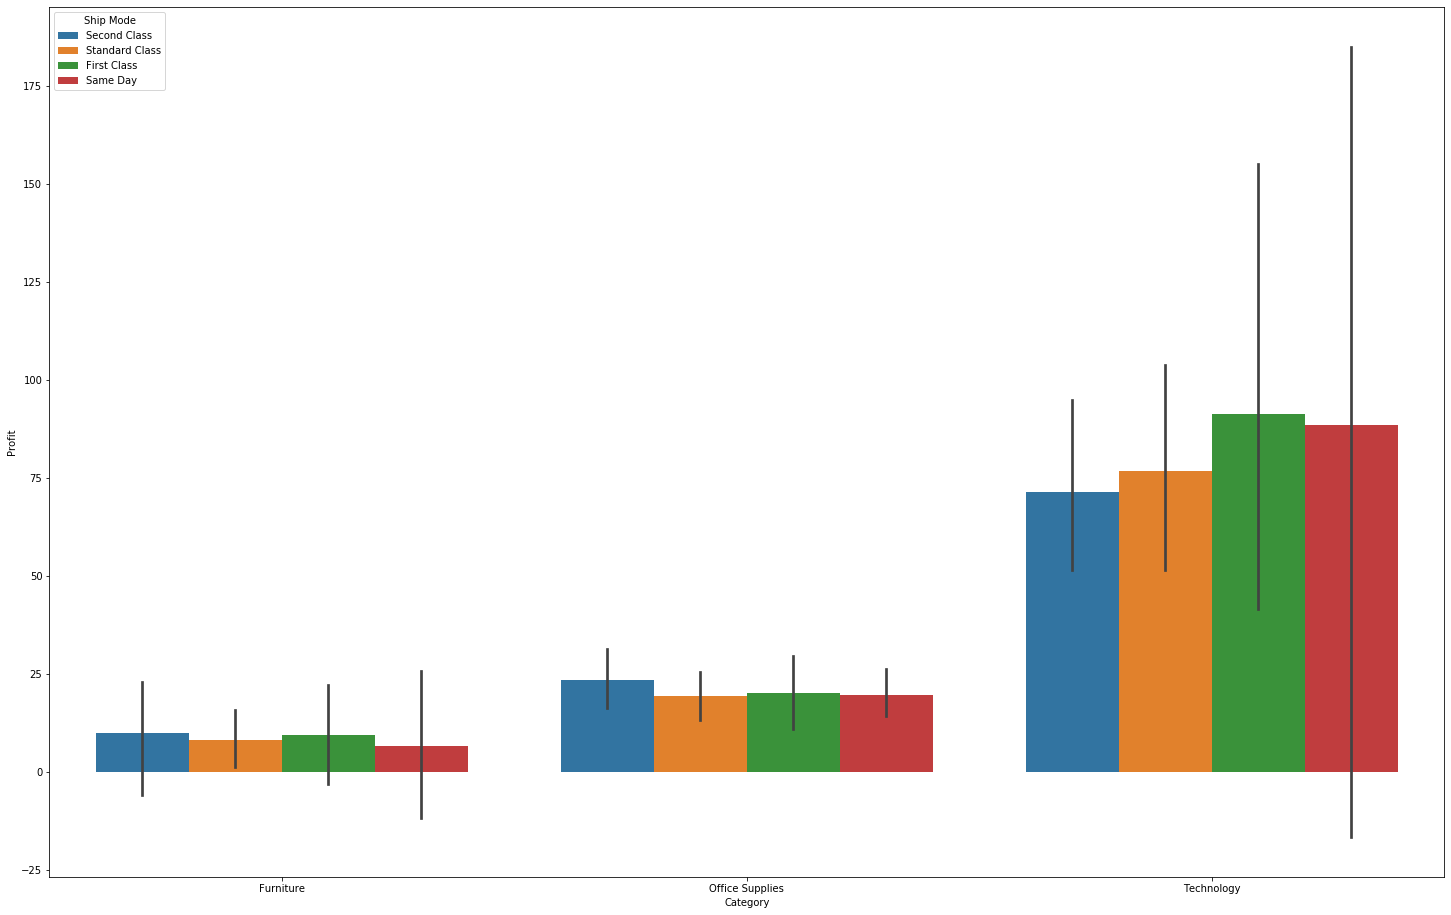

In [19]:
fig, ax = plt.subplots(figsize=(25,16))
sns.barplot( y=df['Profit'], x=df['Category'], hue=df['Ship Mode'], ax=ax)

from this we can see that Technology provides most profit 
while the furniture Category gives the least profit

## PairPlot for overview

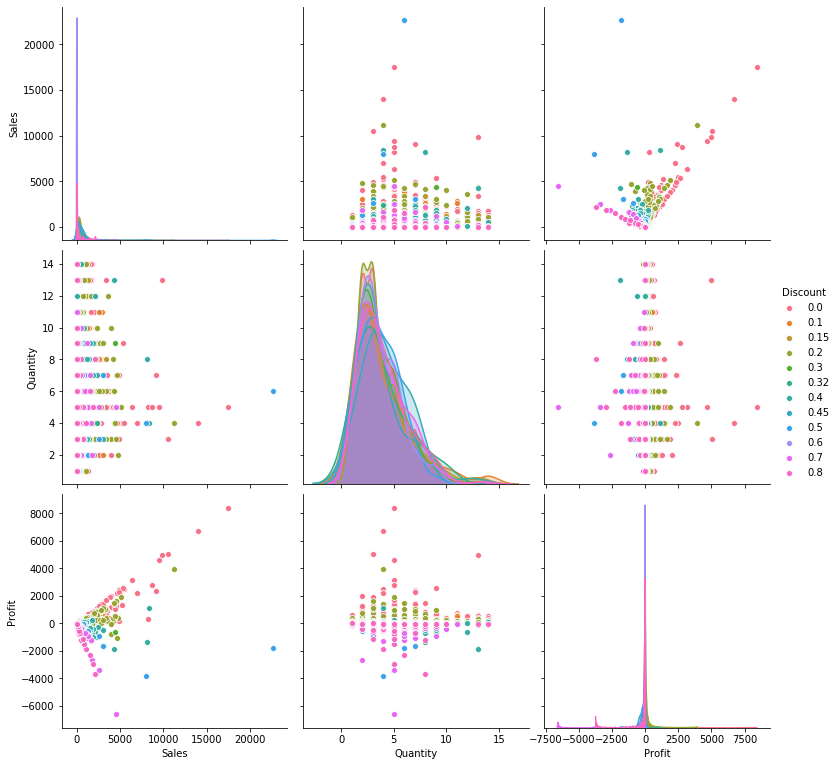

In [20]:
sns.pairplot(df,hue='Discount',height=3.5, kind='scatter')

## discount vs Profit

[None]

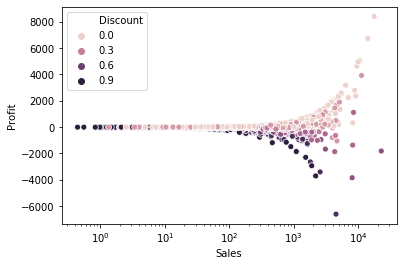

In [44]:
g = sns.scatterplot(x="Sales", y="Profit", hue="Discount",data=df)
g.set(xscale="log")

we can see that for some items there is a direct relation between discount and ptofit
as when discount increases profit decreases or a loss is incured

## category - discount relation

Text(0, 0.5, 'Mean Discount')

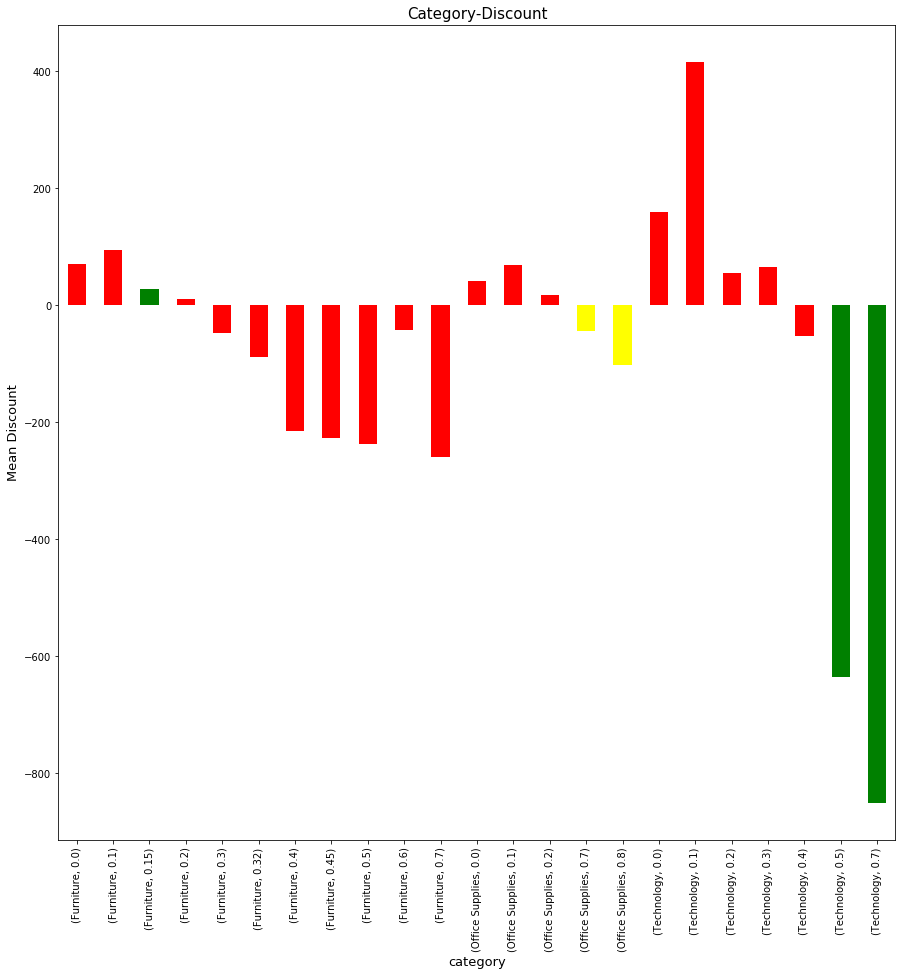

In [15]:
da=df.groupby(['Category','Discount']).Profit.mean()
#col={'Furniture':'Red', 'Technology':'Green', 'Office Supplies':'Yellow'}
col = {'Consumer':'Red', 'Corporate':'Green', 'Home Office':'Yellow'}
da.plot(kind='bar', stacked=True,figsize=(15,15),color=df['Segment'].apply(lambda x: col[x]))
plt.title("Category-Discount", fontsize=15)
plt.xlabel("category", fontsize=13)
plt.ylabel("Mean Discount",fontsize=13)

## sales vs sub-category

Text(0, 0.5, 'sales')

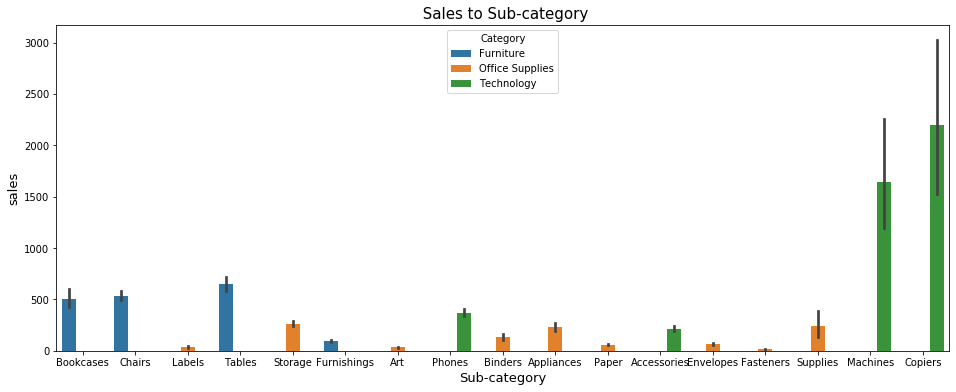

In [16]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot( y=df['Sales'], x=df['Sub-Category'], hue=df['Category'], ax=ax)
plt.title(" Sales to Sub-category", fontsize=15)
plt.xlabel("Sub-category", fontsize=13)
plt.ylabel("sales",fontsize=13)

## Total sales and Profit per Sub-Category

C:\Users\91779\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


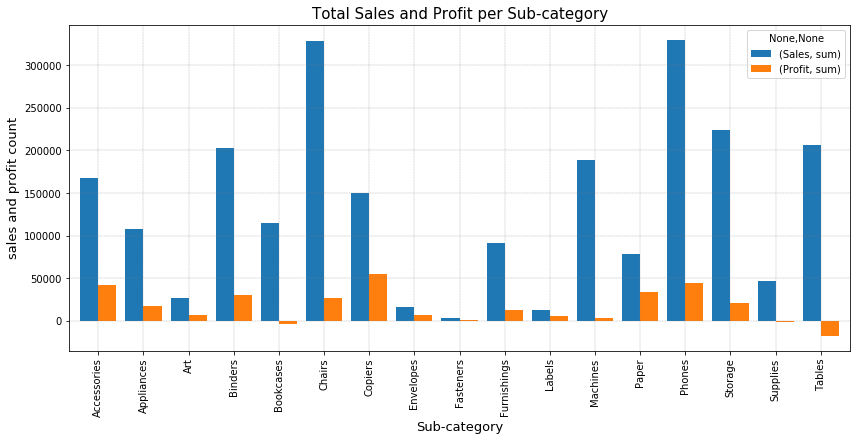

In [88]:
salevpro = df.groupby('Sub-Category')['Sales','Profit'].agg(['sum'])
salevpro.plot.bar(width=0.8,figsize=(14,6))
plt.title("Total Sales and Profit per Sub-category", fontsize=15)
plt.xlabel("Sub-category", fontsize=13)
plt.ylabel("sales and profit count",fontsize=13)
plt.grid(color='gray', linestyle='--', linewidth=0.3)

## Discount vs Sub-Category 

Text(0, 0.5, 'Discount')

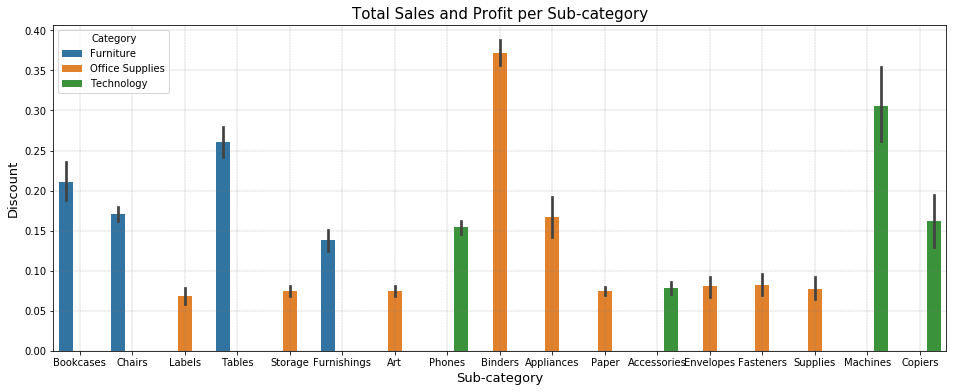

In [17]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot( y=df['Discount'], x=df['Sub-Category'], hue=df['Category'], ax=ax)
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.title("Total Sales and Profit per Sub-category", fontsize=15)
plt.xlabel("Sub-category", fontsize=13)
plt.ylabel("Discount",fontsize=13)

## Profit vs Discount

Text(0, 0.5, 'Profit')

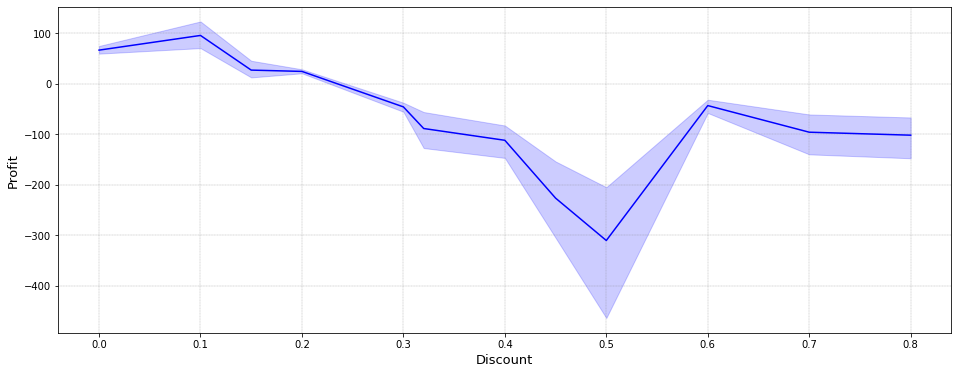

In [18]:
fig, ax = plt.subplots(figsize=(16,6))
sns.lineplot(x=df['Discount'],y=df['Profit'], color='b')
plt.grid(color='gray', linestyle='--', linewidth=0.3)

plt.xlabel("Discount", fontsize=13)
plt.ylabel("Profit",fontsize=13)

## Profit margin for each Sub-Category

Text(0, 0.5, 'profit')

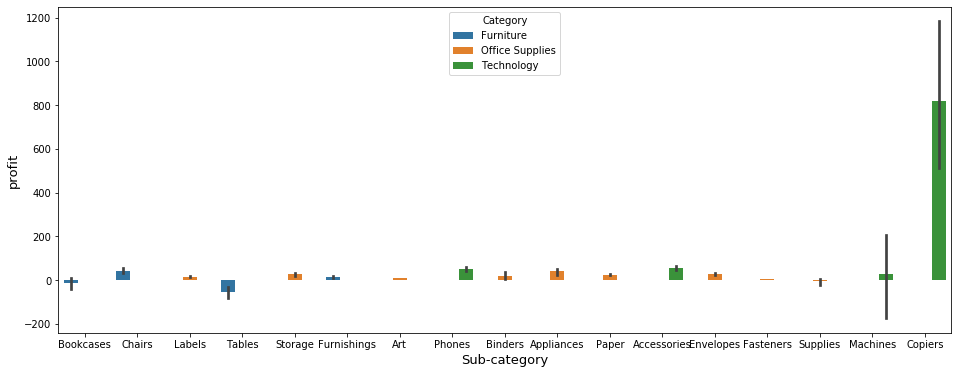

In [19]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot( y=df['Profit'], x=df['Sub-Category'], hue=df['Category'], ax=ax)
#plt.grid(color='gray', linestyle='--', linewidth=0.3)

plt.xlabel("Sub-category", fontsize=13)
plt.ylabel("profit",fontsize=13)

# region-wise  analysis

C:\Users\91779\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


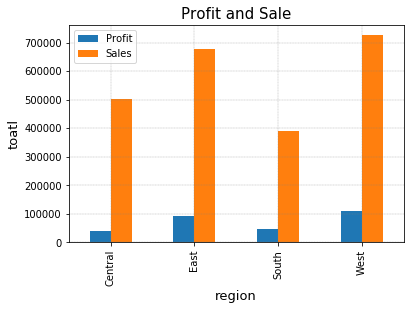

Text(0, 0.5, 'Discount')

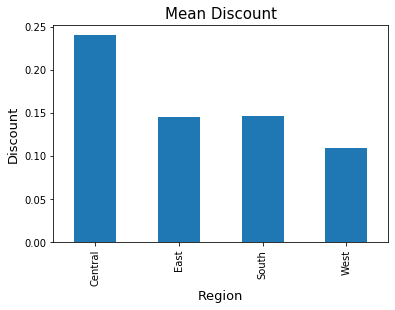

In [13]:
df.groupby("Region")["Profit","Sales"].agg('sum').plot.bar()
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.title("Profit and Sale", fontsize=15)
plt.xlabel("region", fontsize=13)
plt.ylabel("toatl",fontsize=13)
plt.show()

df.groupby("Region")["Discount"].agg('mean').plot.bar()
plt.title("Mean Discount", fontsize=15)
plt.xlabel("Region", fontsize=13)
plt.ylabel("Discount",fontsize=13)


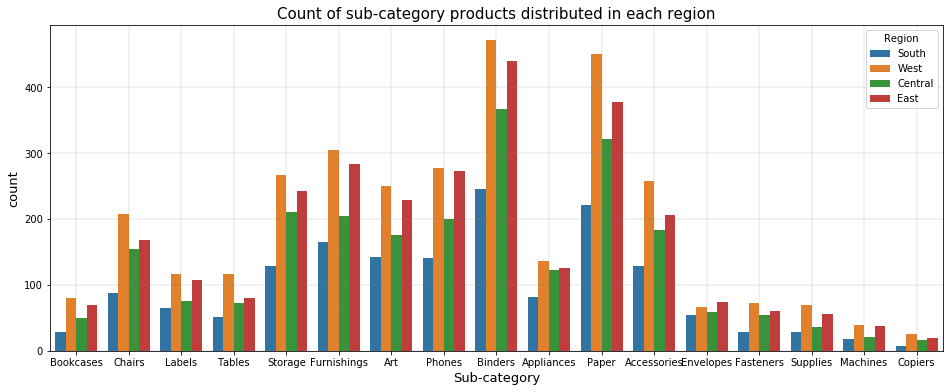

In [14]:
fig, ax = plt.subplots(figsize=(16,6))
sns.countplot( data=df, x='Sub-Category', hue='Region')
plt.title("Count of sub-category products distributed in each region", fontsize=15)

plt.xlabel("Sub-category", fontsize=13)
plt.ylabel("count",fontsize=13)
plt.grid(color='gray', linestyle='--', linewidth=0.3)

## Transaction In each State

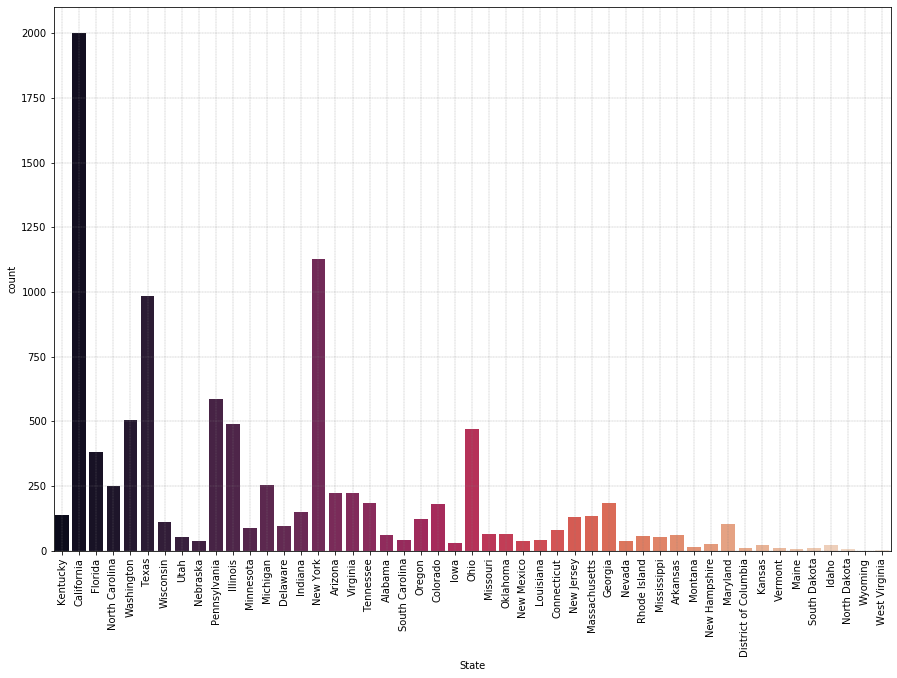

In [21]:


plt.figure(figsize =(15,10))
sns.countplot(df['State'],palette = 'rocket')
plt.xticks(rotation = 90)
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

## state vs Total profit


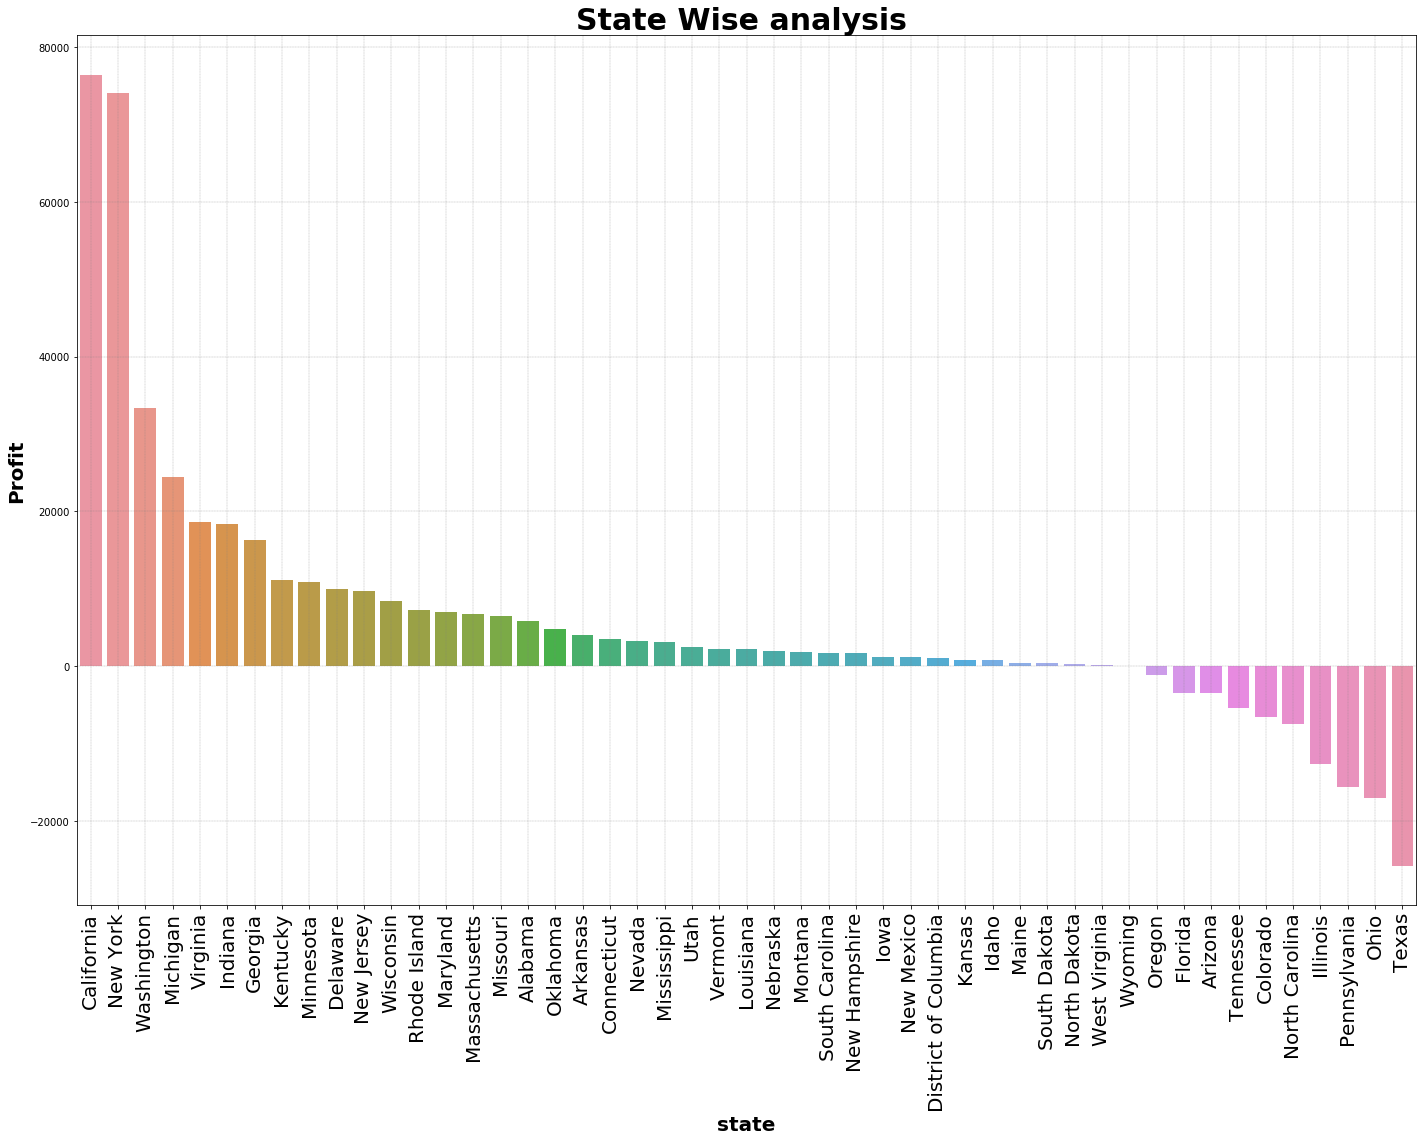

In [24]:
plt.figure(figsize =(24,16))
state1= df.groupby(['State'])['Profit'].sum().sort_values(ascending=False).reset_index()
ed= sns.barplot(x='State',y='Profit',data=state1)
plt.xticks(fontsize=20,rotation=90)

plt.title("State Wise analysis ",fontsize=30,fontweight='bold')
plt.xlabel(xlabel='state',fontsize=20,fontweight='bold')
plt.ylabel(ylabel='Profit',fontsize=20,fontweight='bold')
plt.grid(color='gray', linestyle='--', linewidth=0.3)

## Most profit making States

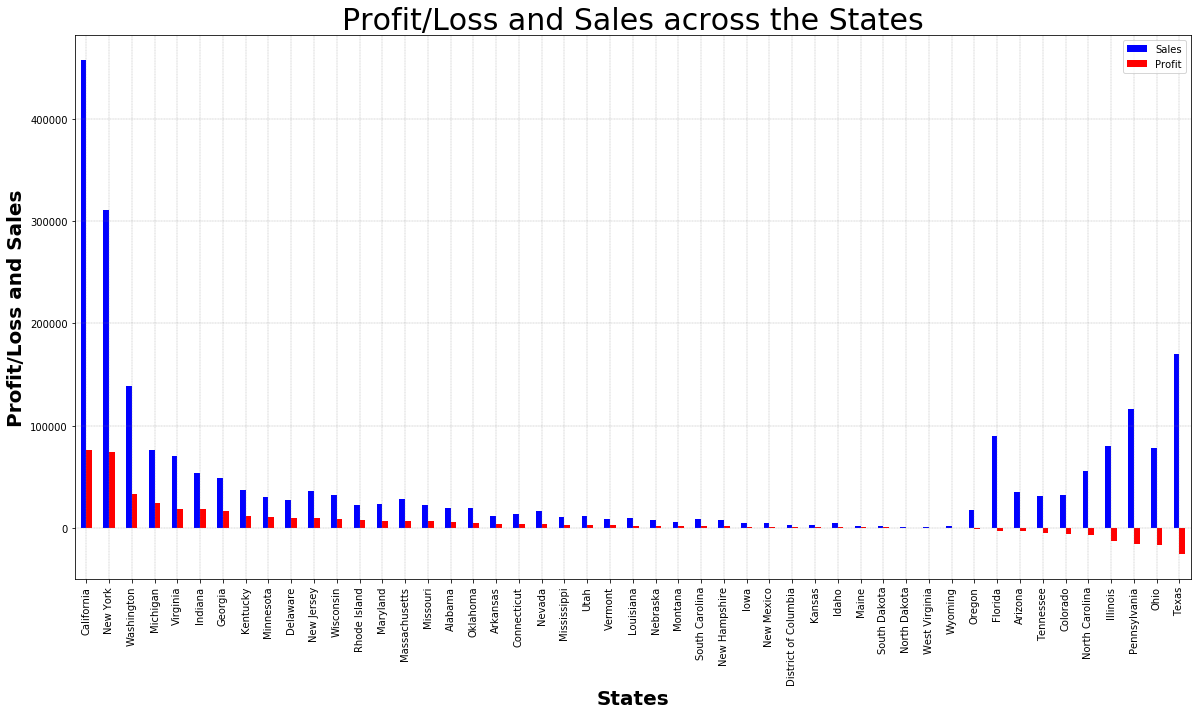

In [26]:
pls=df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Profit',ascending=False)
pls[:].plot.bar(color=['blue','red'],figsize=(20,10))
plt.title('Profit/Loss and Sales across the States',fontsize=30)
plt.xlabel('States',fontsize=20,fontweight='bold')
plt.ylabel('Profit/Loss and Sales',fontsize=20,fontweight='bold')
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()


we can see that in Some states even though the sales is high, we are incurring a loss.
  so lets analyse  further.

### Texas - high sale but low Profit

C:\Users\91779\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


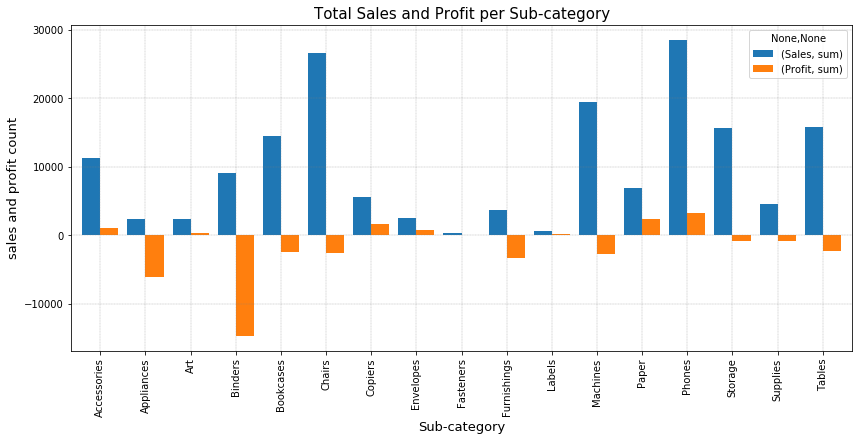

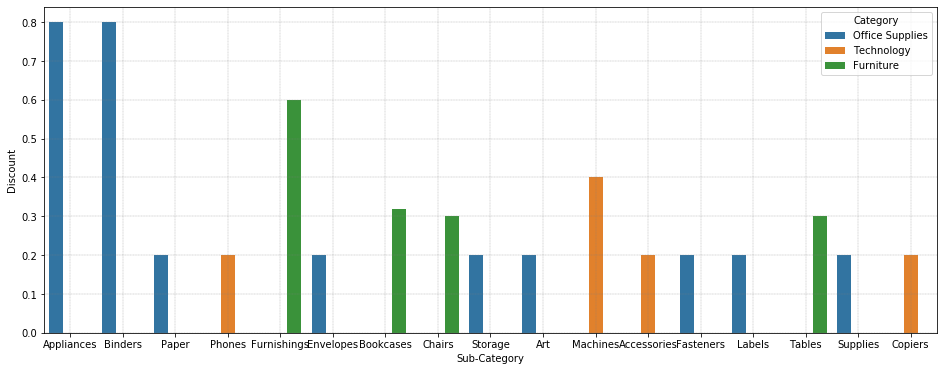

In [153]:
ny=df[df['State']=='Texas']

salevpro = ny.groupby('Sub-Category')['Sales','Profit'].agg(['sum'])
salevpro.plot.bar(width=0.8,figsize=(14,6))
plt.title("Total Sales and Profit per Sub-category", fontsize=15)
plt.xlabel("Sub-category", fontsize=13)
plt.ylabel("sales and profit count",fontsize=13)
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

fig, ax = plt.subplots(figsize=(16,6))
sns.barplot( y=ny['Discount'], x=ny['Sub-Category'], hue=ny['Category'], ax=ax)
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

due to high Discount in Sub-categories like Binders, appliance furnishings . a loss is being occured.

### Pennsylvania - good Sales but High loss

C:\Users\91779\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


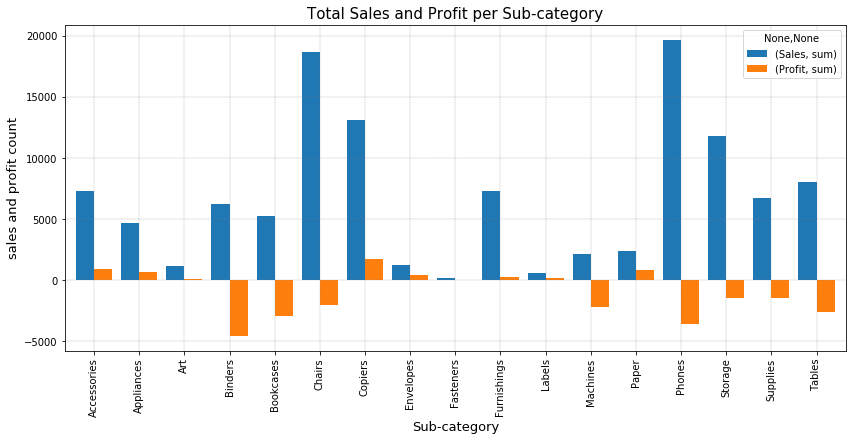

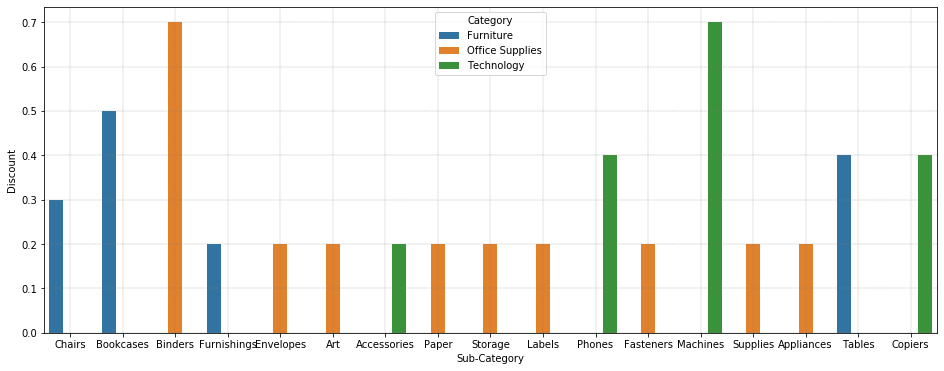

In [151]:
pn=df[df['State']=='Pennsylvania']

salevpro = pn.groupby('Sub-Category')['Sales','Profit'].agg(['sum'])
salevpro.plot.bar(width=0.8,figsize=(14,6))
plt.title("Total Sales and Profit per Sub-category", fontsize=15)
plt.xlabel("Sub-category", fontsize=13)
plt.ylabel("sales and profit count",fontsize=13)
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

fig, ax = plt.subplots(figsize=(16,6))
sns.barplot( y=pn['Discount'], x=pn['Sub-Category'], hue=pn['Category'], ax=ax)
plt.grid(color='gray', linestyle='--', linewidth=0.3)

due to high Discount in Sub-categories like Binders,Bookcases,Machines . a loss is being incured

### California - high sale High Profit

C:\Users\91779\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


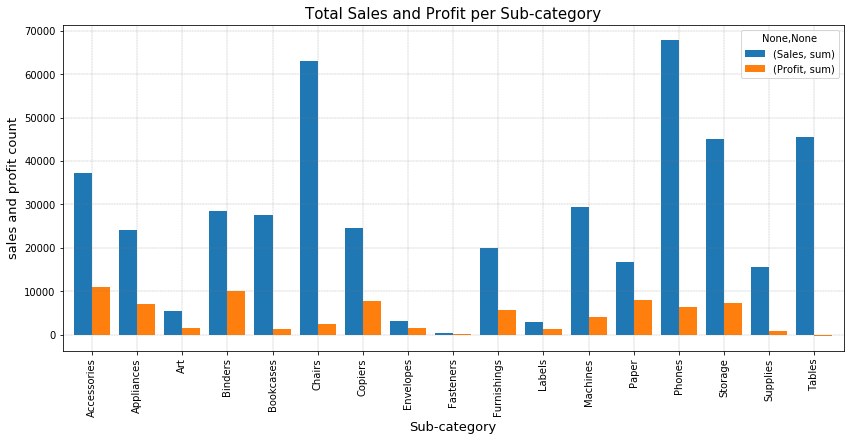

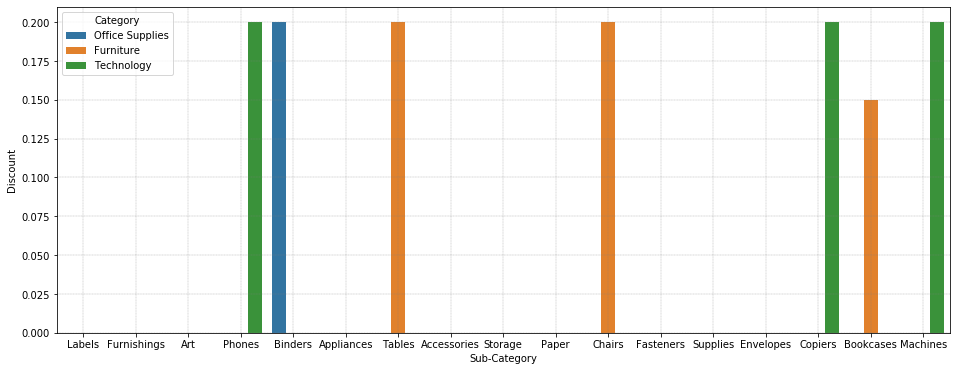

In [29]:
pn=df[df['State']=='California']

salevpro = pn.groupby('Sub-Category')['Sales','Profit'].agg(['sum'])
salevpro.plot.bar(width=0.8,figsize=(14,6))
plt.title("Total Sales and Profit per Sub-category", fontsize=15)
plt.xlabel("Sub-category", fontsize=13)
plt.ylabel("sales and profit count",fontsize=13)
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

fig, ax = plt.subplots(figsize=(16,6))
sns.barplot( y=pn['Discount'], x=pn['Sub-Category'], hue=pn['Category'], ax=ax)
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

## Loss making States - further analysis Required

In [28]:
df1 = df.groupby(['State'], sort=True).sum()
df1 = df1[['Sales', 'Profit']]
df1.sort_values(by='Profit', ascending=False).tail(5)

,Sales,Profit
State,,
North Carolina,55603.1640,-7490.9122
Illinois,80166.1010,-12607.8870
Pennsylvania,116511.9140,-15559.9603
Ohio,78258.1360,-16971.3766
Texas,170188.0458,-25729.3563


## City wise analysis

In [160]:
df.groupby('City')[['Sales','Profit']].sum().sort_values(by='Profit',ascending=False)

,Sales,Profit
City,,
New York City,256368.1610,62036.9837
Los Angeles,175851.3410,30440.7579
Seattle,119540.7420,29156.0967
San Francisco,112669.0920,17507.3854
Detroit,42446.9440,13181.7908
...,...,...
Chicago,48539.5410,-6654.5688
Lancaster,9891.4640,-7239.0684
San Antonio,21843.5280,-7299.0502


### Philadelphia - high sales , high loss

C:\Users\91779\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


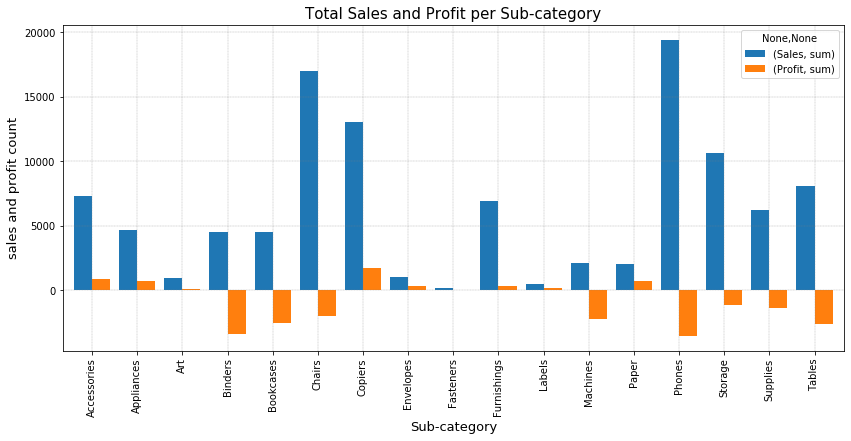

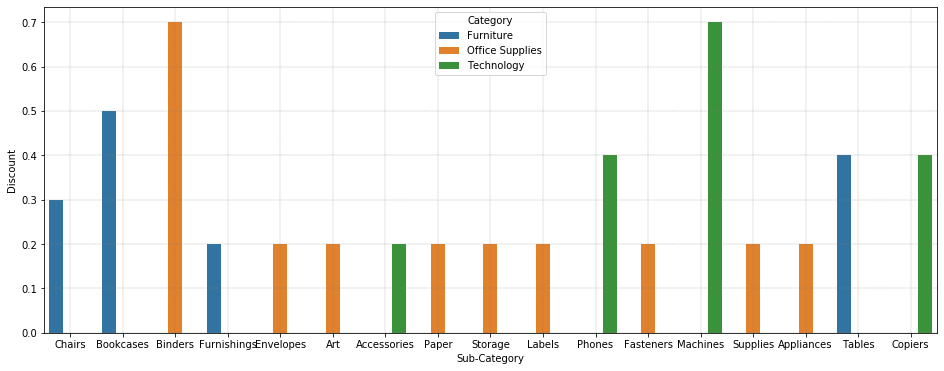

In [161]:
pn=df[df['City']=='Philadelphia']

salevpro = pn.groupby('Sub-Category')['Sales','Profit'].agg(['sum'])
salevpro.plot.bar(width=0.8,figsize=(14,6))
plt.title("Total Sales and Profit per Sub-category", fontsize=15)
plt.xlabel("Sub-category", fontsize=13)
plt.ylabel("sales and profit count",fontsize=13)
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

fig, ax = plt.subplots(figsize=(16,6))
sns.barplot( y=pn['Discount'], x=pn['Sub-Category'], hue=pn['Category'], ax=ax)
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

due to high Discount in Sub-categories like Binders,Bookcases,Machines . a loss is being incured

### Houston- high sales 

C:\Users\91779\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


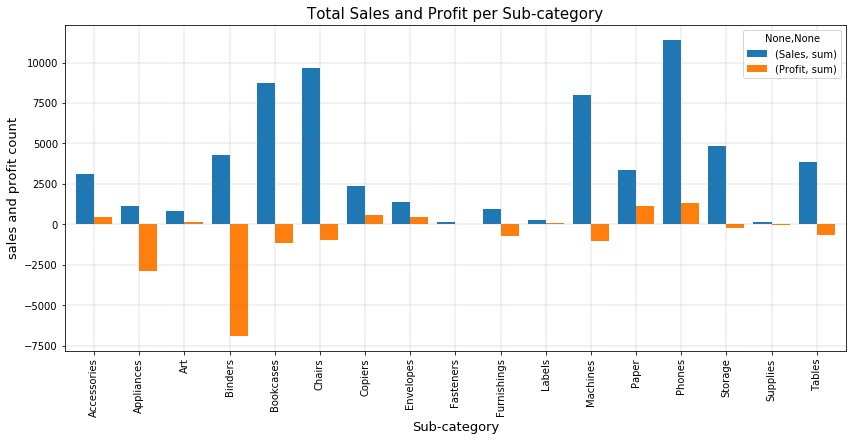

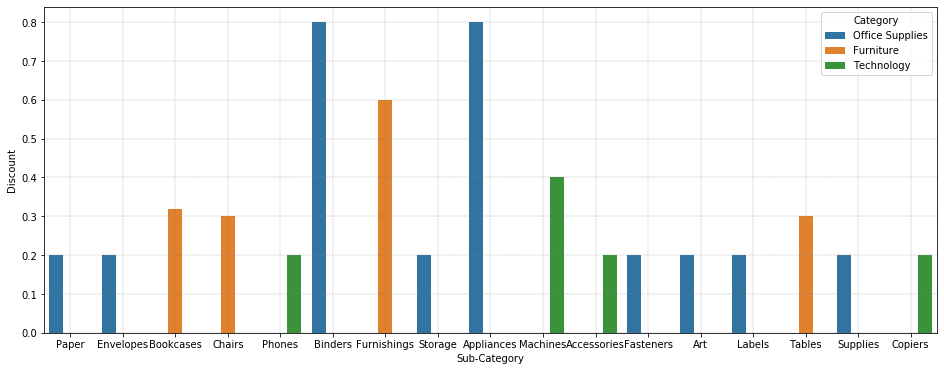

In [162]:
pn=df[df['City']=='Houston']

salevpro = pn.groupby('Sub-Category')['Sales','Profit'].agg(['sum'])
salevpro.plot.bar(width=0.8,figsize=(14,6))
plt.title("Total Sales and Profit per Sub-category", fontsize=15)
plt.xlabel("Sub-category", fontsize=13)
plt.ylabel("sales and profit count",fontsize=13)
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

fig, ax = plt.subplots(figsize=(16,6))
sns.barplot( y=pn['Discount'], x=pn['Sub-Category'], hue=pn['Category'], ax=ax)
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

Most of the Items are making a loss, should be looked into.

### New York- High sales, high Profit

C:\Users\91779\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


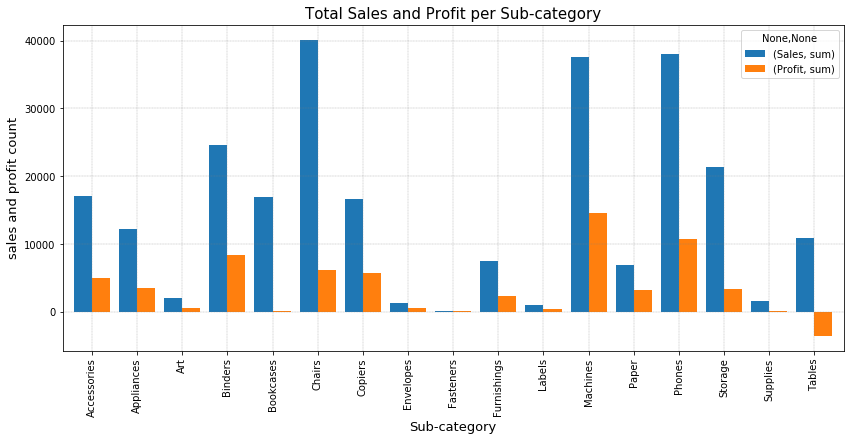

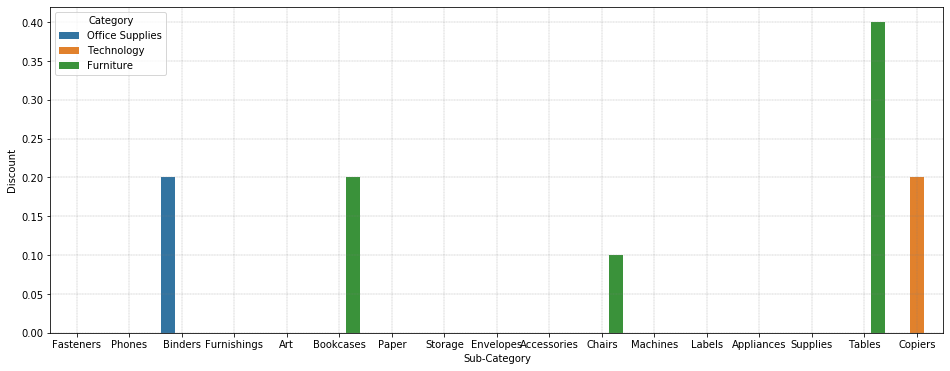

In [6]:
pn=df[df['City']=='New York City']

salevpro = pn.groupby('Sub-Category')['Sales','Profit'].agg(['sum'])
salevpro.plot.bar(width=0.8,figsize=(14,6))
plt.title("Total Sales and Profit per Sub-category", fontsize=15)
plt.xlabel("Sub-category", fontsize=13)
plt.ylabel("sales and profit count",fontsize=13)
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

fig, ax = plt.subplots(figsize=(16,6))
sns.barplot( y=pn['Discount'], x=pn['Sub-Category'], hue=pn['Category'], ax=ax)
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()


# Inferences 

<ol>
    <li><h4>Most Loss is Occuring Due to high discounts</h4> </li>
<li><h4>Incease sales and  Marketing in Sates with Low Sales</h4></li>
<li><h4>Items like Talbes  and Other Furniture Category are mostly Contributing to loss, either discount should be reduced or Other means should be looked into</h4></li>
<li><h4> increase sales of Technology goods like Copiers and Phones etc. which are more Profit making </h4></li>   
    <li><h4> Try to Monopolise markets in high Profit Regions like NewYork by Providing more Discount and Better marketing Stratigies </h4></li>  
</ol>
